# 1. Titanic Dataset - Preprocessing

In [4]:
import pandas as pd 

In [2]:
#read train dataset
df_train = pd.read_csv("Dataset/train.csv") 

In [3]:
#dataset has 891 rows and 12 cols
df_train.shape

(891, 12)

In [4]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Column desc

- `Survived`- Survival	0 = No, 1 = Yes
- `Pclass`- A proxy for socio-economic status (SES) 1st = Upper , 2nd = Middle ,3rd = Lower
- `Name` - Name
- `Sex` - Sex
- `Age` - Age in Years
- `SibSp` - Number of Siblings/Spouses Aboard
- `Parch` -  Number of Parents/Children Aboard
- `Ticket` - Ticket Number
- `Fare` - Passenger Fare
- `Cabin` - Cabin number
- `Embarked` - Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [5]:
#first 5 entries of DataSet
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#chcking for null values and data type of columns 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#null values in columns
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Facts
- PassengerId,Name,Ticket,Cabin are not needed so we will drop them
- Survived is Target Variable

In [8]:
#Dropping columns 
cols=['PassengerId','Name','Ticket','Cabin']
df_train = df_train.drop(cols,axis=1)

In [9]:
df_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [12]:
#finding number of null values 
df_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [14]:
#fill missing Age values
df_train['Age']=df_train['Age'].interpolate()

In [16]:
df_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [20]:
#converting Pclass,Sex,Embarked to dummy variables
#categorical to dummies
dummies = []
cols = ['Pclass', 'Sex', 'Embarked']
for col in cols:
    dummies.append(pd.get_dummies(df_train[col]))


In [21]:
titanic_dummies = pd.concat(dummies, axis=1)

In [22]:
#final dataset
df = pd.concat((df_train,titanic_dummies), axis=1)

In [23]:
#drop orignal comuns from dataset
df = df.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       891 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
 5   1         891 non-null    uint8  
 6   2         891 non-null    uint8  
 7   3         891 non-null    uint8  
 8   female    891 non-null    uint8  
 9   male      891 non-null    uint8  
 10  C         891 non-null    uint8  
 11  Q         891 non-null    uint8  
 12  S         891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(8)
memory usage: 41.9 KB


In [36]:
# predict the probability of a survival
# of a person based on gender, age and passenger-class
cols = ['SibSp','Parch','Fare','C','Q','S',]
df = df.drop(cols,axis=1)

In [37]:
df.columns

Index(['Survived', 'Age', 1, 2, 3, 'female', 'male'], dtype='object')

# 2 .Spliting into train & test dataset

In [38]:
#seprating out target and factor attributes
X = df.values
y = df['Survived'].values

In [42]:
import numpy as np
X = np.delete(X,1,axis=1)

In [43]:
#dividing into train and test state
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# 3. Questions Answered
1. How many of the survived were male, female? 
2. Within this, how many were children in each gender category?
3. What does the SibSp, Parch, Cabin, Embark column signify? Can we attach external datasets to enrich the information?
4. Is Fare just a number or is correlated with other columns? If yes, which ones?
5. Which social class had a better chance of survival?
6. Does having a sibling or spouse increased chances of Survival?
7. How is no of children effecting the rate of Survial?

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv("Dataset/train.csv")

In [25]:
print(df.columns)
df['Age']=df['Age'].interpolate()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [26]:
df.dropna(inplace=True)

### 1.How many of the survived were male, female?

In [27]:
print("Percentage of females who survived:", df["Survived"][df["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", df["Survived"][df["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

Percentage of females who survived: 93.6842105263158
Percentage of males who survived: 42.05607476635514


In [28]:
#from age to category 
def get_who(row):
    # print(row, type(row))
    str_who = ""
    age = row['Age']
    gender = row['Sex']
    if 0<age<=12:
        str_who += 'child'
    elif 12<age<=50:
        str_who +=  'adult'
    elif 50<age:
        str_who +=  'senior'
    
    str_who += '_' + gender
    return str_who

In [29]:
df['who'] = df.apply(lambda row: get_who(row), axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,who
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult_female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult_female
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,senior_male
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child_female
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,senior_female


###  2 .Children in each gender category who survived?

In [30]:
print("Percentage of females children who survived:", df["Survived"][df["who"] == 'child_female'].value_counts(normalize = True)[1]*100)

print("Percentage of males children who survived:", df["Survived"][df["who"] == 'child_male'].value_counts(normalize = True)[1]*100)

Percentage of females children who survived: 50.0
Percentage of males children who survived: 87.5


/home/prajakta/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


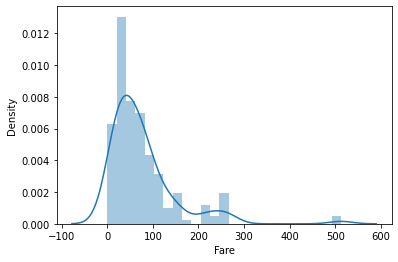

In [33]:
sns.distplot(df['Fare']);

In [35]:
# Listing most related continious values to fare.

train_corr = df[['Survived', 'Age', 'Fare','Sex','Pclass'
                      ]].corr(method='spearman').abs().unstack().sort_values(
                          kind='quicksort', ascending=False).reset_index()
train_corr.rename(columns={
    'level_0': 'Feature A',
    'level_1': 'Feature B',
    0: 'Correlation Coefficient'
},
                  inplace=True)
train_corr[(train_corr['Feature A'] == 'Fare')].style.background_gradient(
    cmap='summer_r')

,Feature A,Feature B,Correlation Coefficient
2,Fare,Fare,1.000000
4,Fare,Pclass,0.548136
11,Fare,Survived,0.178148
13,Fare,Age,0.018040


### 3. Is Fare just a number or is correlated with other columns? If yes, which ones?
`Fare is correlated with Pclass Column`

###  4. What does the SibSp, Parch, Cabin, Embark column signify? Can we attach external datasets to enrich the information?

- `SibSp` - Number of Siblings/Spouses Aboard
- `Parch` -  Number of Parents/Children Aboard
- `Cabin` - Cabin number
- `Embarked` - Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

<br> Yes we can through wikipedia this is kaggle link for [Titanic Extended Dataset](https://www.kaggle.com/pavlofesenko/titanic-extended)

### 5. Which social class had a better chance of survival?

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


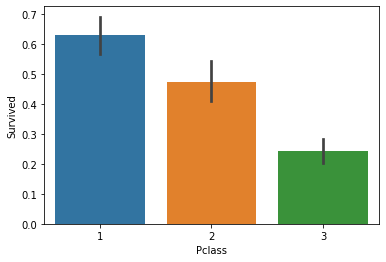

In [39]:
sns.barplot(x="Pclass", y="Survived", data=df)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", df["Survived"][df["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", df["Survived"][df["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", df["Survived"][df["Pclass"] == 3].value_counts(normalize = True)[1]*100)

`P class 1 had better chance of survival`

### 6. Does having a sibling or spouse increased chances of Survival?

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


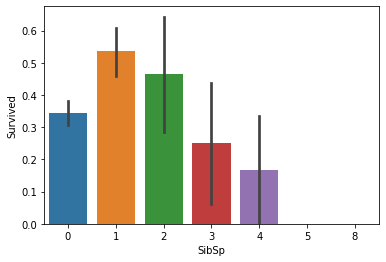

In [43]:
# bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=df)

print("Percentage of SibSp = 0 who survived:", df["Survived"][df["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", df["Survived"][df["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", df["Survived"][df["SibSp"] == 2].value_counts(normalize = True)[1]*100)


`People with no siblings or spouses were less to likely to survive than those with one or two`

### 7. How is no of children effecting the rate of Survial?

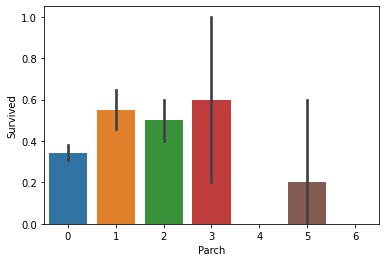

In [47]:
sns.barplot(x="Parch", y="Survived", data=df)
plt.show()

`
People with less than four parents or children aboard are more likely to survive than those with four or more. Again, people traveling alone are less likely to survive than those with 1-3 parents or children.
`